# Esercitazione 11
  ## 9 Maggio 2023

Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 
 

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.array([1, 2])

# Ritorna i coefficienti del polinomi facendo (x-1)(x-2) = x^2-3x+2
coeff = np.poly(x)
print(x)
print(coeff)

[1 2]
[ 1. -3.  2.]


In [21]:
# Funzione che calcola l'i-esimo polinomio di base
def plagr(xnodi, i):
    # A partire dal vettore xnodi, costruisco il vettore dei nodi 
    # ottenuto escludendo l'i-esimo
    x_tilde = np.zeros_like(xnodi)
    n = xnodi.shape[0]

    # Realizzo il vettore escludendo sempre la componente i-esima che 
    # non è da considerarsi nella produttoria
    if i == 0:
        x_tilde = xnodi[1:n]
    else:
        x_tilde = np.append(xnodi[0:i], xnodi[i + 1:n])

    # La funzione poly ci ritorna i coefficienti della produttoria in ordine dalla potenza
    # più alta: cerco gli zeri
    num = np.poly(x_tilde)

    # Denominatore valutato in xi
    den = np.polyval(num, xnodi[i])

    # Singolo elemento della produttoria
    p = num / den

    return p

In [22]:
def interpL(x, y, xx):

    n = x.shape[0]
    m = xx.shape[0]
    matL = np.zeros((m, n))

    for i in range(n):
        p = plagr(x, i)
        L = np.polyval(p, xx)
        matL[:, i] = L

    pol = matL @ y

    return pol


**Sperimentazione numerica**

 
## Esercizio 1

Si disegnino i grafici dei polinomi di Lagrange associati ai nodi $\{0, 1/4, 1/2, 3/4, 1\}$ e ai nodi $\{-1, -0.7, 0.5, 2\}$.



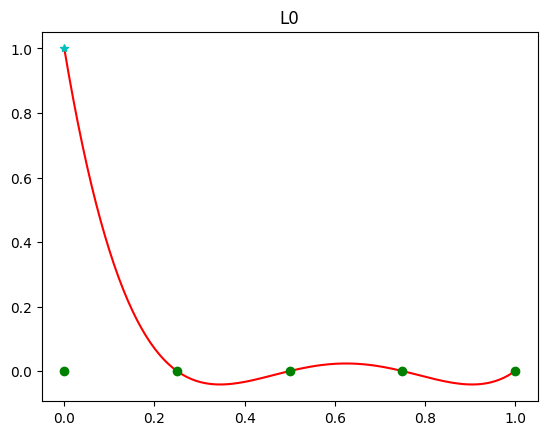

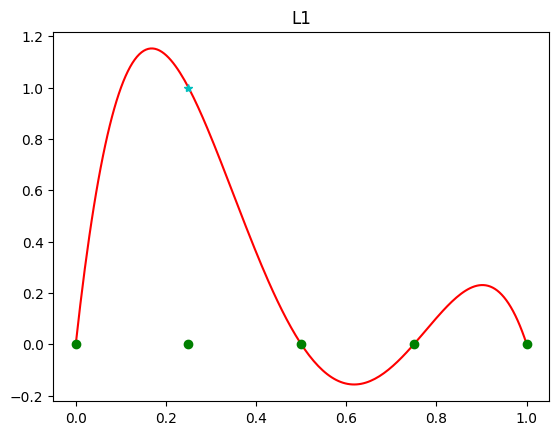

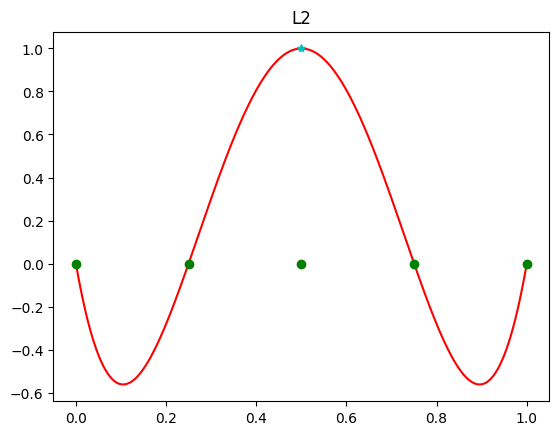

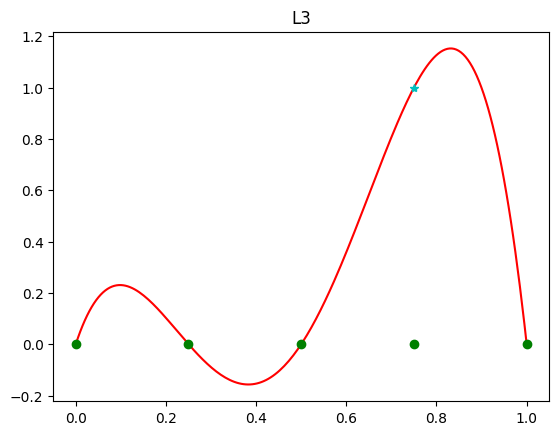

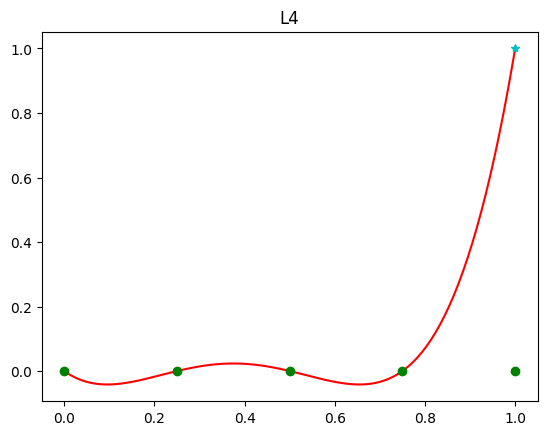

In [23]:
# Nodi di interpolazione
x = np.array([0.0, 1/4, 1/2, 3/4, 1.0])
y = np.array([-1.0, -0.7, 0.5, 2.0])

n = x.shape[0]
# Questi sono i punti della funzione di Lagrange: li uso per valutare il polinomio interpolatore
# e realizzarne il grafico
xx = np.linspace(x[0], x[n - 1], 200)

for i in range(n):
    p = plagr(x, i)
    # Funzione base valutata nei punti
    L = np.polyval(p, xx)
    plt.plot(xx, L, 'r-')
    # Costruisco per ogni x un valore 0: dimostro che il polinomio i si annulla nell'indice i
    plt.plot(x, np.zeros((n, )), 'go')
    # L'i-esimo polinomio di grado n ha valore 1
    plt.plot(x[i], 1, 'c*')
    plt.title("L" + str(i))
    plt.show()


## Esercizio 2

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.




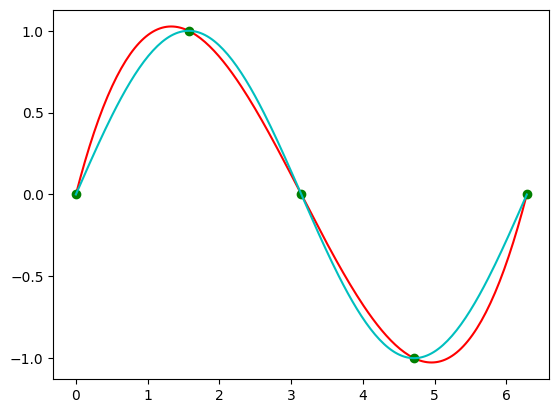

In [24]:
x = np.arange(0, 2 * np.pi + 0.1, np.pi/2)
y = np.sin(x)
n = x.shape[0]
xx = np.linspace(x[0], x[n - 1], 200)
pol = interpL(x, y, xx)

# Con quelle 5 coppie di pallini si costruisce il polinomio interpolato che
# differisce di poco da quello ciano che è quello esatto
plt.plot(xx, pol, 'r-', x, y, 'go', xx, np.sin(xx), 'c-')

## Esercizio 3
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

## Esercizio 4
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.



## Esercizio 5 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).



## Esercizio 6

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.



## Esercizio 7

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 8

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.

 